<a href="https://colab.research.google.com/github/ECV21/Machine-learning-/blob/main/Resumen_Algoritmos_de_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science with python *tutorial*


# Understanding Data Processing

Data Processing is the taks of converting data from a given form to a mucho more usable and desired form. i.e. making it more meaningful and informative.
DAta processing is a crucial step in the machine learning ML pipeline, as it prepares the data for use in bulding and trainning ML models.

The goal of data processing is to clean, transform, and prepare the data in a format that is suitable for mdodeling.

# The main steps involved in data processing are:

1. Data cleaning: this step involves identifying and removing any missing, duplicate, or irrelevant data.
2. Data transformation: this step involves converting the data into a format that is suitable for modeling (normaliaing data, converting categorical data into numerical, and reducing the dimensionality of the data).
3. Data preparation: this step involves splitting the data into trainning and testing datasets. The training dataset is used to train the ML model, while the testing dataset is used to evaluate the performance of the model.


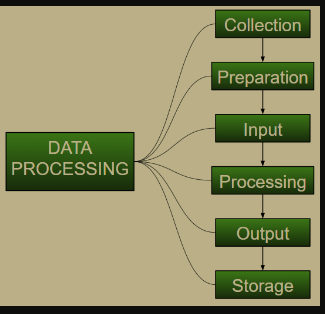

# Feature Enginnering: scaling, normalization, and standardization

what is Feature Scaling? is a technique to standardize tge independet features present in the data in a fixed range. It is performed during the data pre-processing to handle highly magnitudes or values or units.

# 1. Absolute Maximum scaling
This method of scaling requires two-step:
1. We should first select the  maximun absolute value out of all the entries of a particular measure.
2. Then after this, we divide each entry of the column by this maximum value.

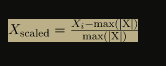

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("datos_ejercicios.csv")

df.dropna(inplace=True)#eliminar filas con NA
df.head()

,ANIO_GASTO,MES_GASTO,cliente,Edad,Genero,Gasto,ENTIDAD,DH,Tipo_empleado,medicamento
0,2019.0,5.0,EDPM,26,Hombre,8055.609234,Campeche,Beneficiario,Activo,patete
1,2022.0,11.0,BANOBRAS,40,H,9653.998756,Tabasco,Beneficiario,Jubilado,generio
2,2019.0,10.0,HSBC,53,Masculino,9918.343847,Estado de México,Beneficiario,Activo,generio
3,2020.0,4.0,SANTANDER,68,H,11754.846660,Querétaro,Beneficiario,Jubilado,patete
4,2019.0,6.0,SANTANDER,47,Femenino,9665.533492,Guanajuato,Beneficiario,Activo,generio


In [ ]:
# to evaluate the absolute maximun values of the columns: Gasto
df_2 = df[["Gasto", "Edad"]]

max_vals = np.max(np.abs(df_2))
max_vals

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Gasto    13565.01406
Edad        69.00000
dtype: float64

In [ ]:
# Now we are supposed to subtract these vlues from the data and then divide the results from the maximum values as well

print(((df_2 - max_vals)/ max_vals))

        Gasto      Edad
0   -0.406148 -0.623188
1   -0.288316 -0.420290
2   -0.268829 -0.231884
3   -0.133444 -0.014493
4   -0.287466 -0.318841
..        ...       ...
665 -0.340682 -0.391304
675 -0.117243 -0.521739
677 -0.283890 -0.028986
680 -0.326587 -0.101449
681 -0.321551 -0.710145

[658 rows x 2 columns]


# 2. Min-Max Scling

This method of scaling requires below two-steps:
1. Firts, we are supposed to find the minimum and the maximun value of the column.
2. Then we will subtract the minimum value from the entry nd divide the result by the difference between the maximum and the minimum value.

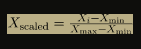

In [ ]:
# As we are using the maximum and the minimum value this method is also prone to outliers but the
#range in which the data will range after performing the above two steps is between 0 to 1.
df_2 = df[["Gasto", "Edad"]]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(scaled_data, columns=df_2.columns)
scaled_df.head()

,Gasto,Edad
0,0.159576,0.156863
1,0.403400,0.431373
2,0.443724,0.686275
3,0.723871,0.980392
4,0.405160,0.568627


# 3. Normalization

This method is more o less the ame as the previous method but here instead of the minimum vallue, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.

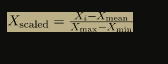

In [ ]:
df_2 = df[["Gasto", "Edad"]]
from sklearn.preprocessing import Normalizer


scaler = Normalizer()
scaled_data = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(scaled_data, columns=df_2.columns)
print(scaled_df.head())

      Gasto      Edad
0  0.999995  0.003228
1  0.999991  0.004143
2  0.999986  0.005344
3  0.999983  0.005785
4  0.999988  0.004863


# 4.Standardizaion

This method of scaling is basically based on the central tendencies and variances of the data.

1. First, we should calculate the men and standard desviation of the data we would like to normalize.
2. Then we are supposed to subtract the mean value from each entry and then dividde the result by the standar deviation.

This heps us archieve a normal distribution of the data with a mean equal to zero and standard deviation equal to 1.


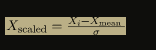

In [ ]:
df_2 = df[["Gasto", "Edad"]]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(scaled_data, columns = df_2.columns)

scaled_df.head()

,Gasto,Edad
0,-1.887669,-1.240328
1,-0.341779,-0.296585
2,-0.086117,0.579749
3,1.690066,1.590902
4,-0.330623,0.175287


# 5. Robust scaling

In this method of scaling, we using two main sttical measures of the data.

* median
* inter-Quartile range

After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.

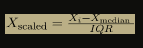



In [ ]:
df_2 = df[["Gasto", "Edad"]]

from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df_2.columns)
print(scaled_df.head())

      Gasto  Edad
0 -1.418918 -0.76
1 -0.233336 -0.20
2 -0.037262  0.32
3  1.324938  0.92
4 -0.224780  0.08


# Label Encoding in python

In machine learning projects, we usually deal withn datasets having different categorical columns where some columns have elements in the ordinal variable categori for e.g a column income level having elements as los, medium, or high in this cse we can replace these elements with 1,2,3.

Label encoding
Is a technique that is used to covert categorical columns into nemerical ones so thaht they can be fitted by machine learning model which only take numerical data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("datos_ejercicios.csv")

df.dropna(inplace=True)#eliminar filas con NA
df.head()

,ANIO_GASTO,MES_GASTO,cliente,Edad,Genero,Gasto,ENTIDAD,DH,Tipo_empleado,medicamento
0,2019.0,5.0,EDPM,26,Hombre,8055.609234,Campeche,Beneficiario,Activo,patete
1,2022.0,11.0,BANOBRAS,40,H,9653.998756,Tabasco,Beneficiario,Jubilado,generio
2,2019.0,10.0,HSBC,53,Masculino,9918.343847,Estado de México,Beneficiario,Activo,generio
3,2020.0,4.0,SANTANDER,68,H,11754.846660,Querétaro,Beneficiario,Jubilado,patete
4,2019.0,6.0,SANTANDER,47,Femenino,9665.533492,Guanajuato,Beneficiario,Activo,generio


In [ ]:
df["Genero"].unique()

array(['Hombre', 'H', 'Masculino', 'Femenino', 'Mujer'], dtype=object)

In [ ]:
# primero homologar los datos categoricos

homologar_g = {
    "Hombre":"Masculino",
    "H":"Masculino",
    "Masculino":"Masculino",
    "Femenino":"Femenino",
    "Mujer":"Femenino"
}

df["Genero"]=df["Genero"].map(homologar_g)
df["Genero"].unique()

array(['Masculino', 'Femenino'], dtype=object)

In [ ]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Genero']= label_encoder.fit_transform(df['Genero'])

df['Genero'].unique()

array([1, 0])

# One Hot Encoding in Machine Learning

Dataset consist of both ctegorical as well as numerical columns. However, varios Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data.

For example, a Gender columns with categorical elements like Male and Famele, these labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.
One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example MALE and FAMELE mapped to o and 1.
But this can add bias in our model as it will start giving higher preference to the dataset. To deal with this issue we will use the One Hot Encoding technique.

# One Hot Encoding

One hot encoding is a technique that we use to represent categorical varaibles as numercial vallues in a machine learning model.

In One Hot Encoding, the categorical parameters will prepare separate columns for both Male and Female labes. So, wherever there is a Male, the value will be 1 in the Male columns and 0 in the Female column, and vice-versa.

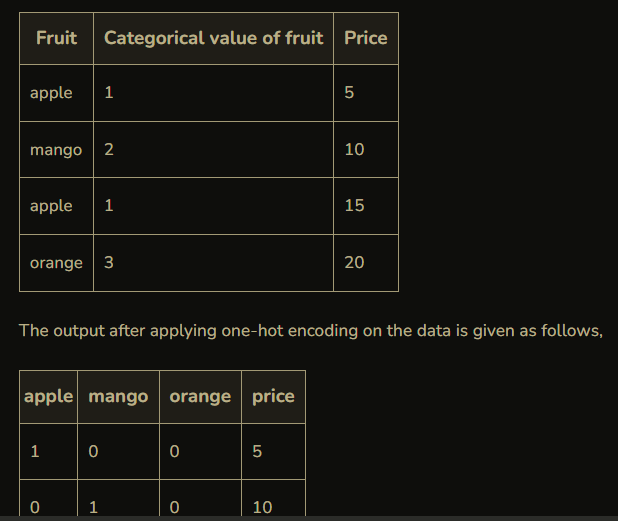

In [ ]:
# Program for demonstration of one hot encoding

# import libraries
import numpy as np
import pandas as pd

df = pd.read_csv("datos_ejercicios.csv")

df.dropna(inplace=True)#eliminar filas con NA
df.head()

,ANIO_GASTO,MES_GASTO,cliente,Edad,Genero,Gasto,ENTIDAD,DH,Tipo_empleado,medicamento
0,2019.0,5.0,EDPM,26,Hombre,8055.609234,Campeche,Beneficiario,Activo,patete
1,2022.0,11.0,BANOBRAS,40,H,9653.998756,Tabasco,Beneficiario,Jubilado,generio
2,2019.0,10.0,HSBC,53,Masculino,9918.343847,Estado de México,Beneficiario,Activo,generio
3,2020.0,4.0,SANTANDER,68,H,11754.846660,Querétaro,Beneficiario,Jubilado,patete
4,2019.0,6.0,SANTANDER,47,Femenino,9665.533492,Guanajuato,Beneficiario,Activo,generio


In [ ]:
# unique Elements in categorical columns

print(df["cliente"].unique())
print(df["DH"].unique())

['EDPM' 'BANOBRAS' 'HSBC' 'SANTANDER' 'CONDUSEF']
['Beneficiario' 'Titular']


# One-Hot Encoding of Categorical columns using pandas library

We can use pd.get.dummies() function from pandas to one-hot enconde the categorical columns.

In [ ]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['cliente', 'DH'])
print(one_hot_encoded_data)

     ANIO_GASTO  MES_GASTO  Edad     Genero         Gasto  \
0        2019.0        5.0    26     Hombre   8055.609234   
1        2022.0       11.0    40          H   9653.998756   
2        2019.0       10.0    53  Masculino   9918.343847   
3        2020.0        4.0    68          H  11754.846660   
4        2019.0        6.0    47   Femenino   9665.533492   
..          ...        ...   ...        ...           ...   
665      2019.0        4.0    42   Femenino   8943.654742   
675      2020.0        4.0    33          H  11974.613210   
677      2022.0        3.0    67  Masculino   9714.035974   
680      2022.0       12.0    62   Femenino   9134.855579   
681      2019.0        5.0    20   Femenino   9203.168169   

                 ENTIDAD Tipo_empleado medicamento  cliente_BANOBRAS  \
0               Campeche        Activo      patete                 0   
1                Tabasco      Jubilado     generio                 1   
2       Estado de México        Activo     generio 

We can observe that we have 4 "cliente" and 2 "DH" columns in the data. However, you can just use n-1 columns to define parameters if it has n unique labes.

For example, if we only keeo "DH_Beneficiario" column and drop the "DH_Beneficiario" column, then also we can convey the enteri information as when the label is 1, it means BENEFICIARIO and when the label is 0 it mean TITULAR. This way we can encode the categorical data and reduce the number of parameters as well.

## One-Hot Encoding using Sci-kit Learning Library

Scikit-learn (sklearn) is  popular machine-learning library in python that provide numerous tools for data preprocessing. It provides a OneHotEncoder function that we use for encoding ctegorical and numerica vriables into binary vector, also before implementing this algorithm.
Make sure the categorical values must are labeled and encoded as one-hot encoding only numerical categoricla values.

In [ ]:
# import libraries
import numpy as np
import pandas as pd

df = pd.read_csv("datos_ejercicios.csv")

df.dropna(inplace=True)#eliminar filas con NA
df.head()

,ANIO_GASTO,MES_GASTO,cliente,Edad,Genero,Gasto,ENTIDAD,DH,Tipo_empleado,medicamento
0,2019.0,5.0,EDPM,26,Hombre,8055.609234,Campeche,Beneficiario,Activo,patete
1,2022.0,11.0,BANOBRAS,40,H,9653.998756,Tabasco,Beneficiario,Jubilado,generio
2,2019.0,10.0,HSBC,53,Masculino,9918.343847,Estado de México,Beneficiario,Activo,generio
3,2020.0,4.0,SANTANDER,68,H,11754.846660,Querétaro,Beneficiario,Jubilado,patete
4,2019.0,6.0,SANTANDER,47,Femenino,9665.533492,Guanajuato,Beneficiario,Activo,generio


In [ ]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['cliente'] = df['cliente'].astype('category')
df['DH'] = df['DH'].astype('category')


# Assigning numerical values and storing it in another columns
df['cliente_new'] = df['cliente'].cat.codes
df['DH_new'] = df['DH'].cat.codes


# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    df[['cliente_new', 'DH_new']]).toarray())

# Merge with main
New_df = df.join(enc_data)

print(New_df)


     ANIO_GASTO  MES_GASTO    cliente  Edad     Genero         Gasto  \
0        2019.0        5.0       EDPM    26     Hombre   8055.609234   
1        2022.0       11.0   BANOBRAS    40          H   9653.998756   
2        2019.0       10.0       HSBC    53  Masculino   9918.343847   
3        2020.0        4.0  SANTANDER    68          H  11754.846660   
4        2019.0        6.0  SANTANDER    47   Femenino   9665.533492   
..          ...        ...        ...   ...        ...           ...   
665      2019.0        4.0       HSBC    42   Femenino   8943.654742   
675      2020.0        4.0  SANTANDER    33          H  11974.613210   
677      2022.0        3.0  SANTANDER    67  Masculino   9714.035974   
680      2022.0       12.0   CONDUSEF    62   Femenino   9134.855579   
681      2019.0        5.0  SANTANDER    20   Femenino   9203.168169   

                 ENTIDAD            DH Tipo_empleado medicamento  cliente_new  \
0               Campeche  Beneficiario        Activo  

In [ ]:
New_df["DH_new"]

0      0
1      0
2      0
3      0
4      0
      ..
665    1
675    0
677    1
680    1
681    0
Name: DH_new, Length: 658, dtype: int8

# Supervised learning

A machine is said to be learning from past Experiences (data feed-in) with respect to some class of task its performance in a give Task improves with the Experience.

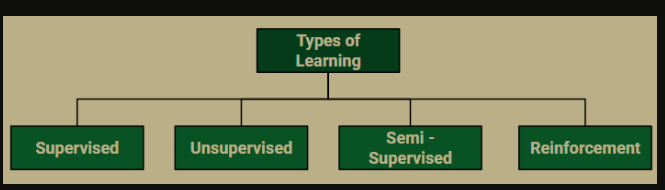

Supervised learning is when the model is geting trained on a labelled dataset. A labelled dataset is one that has both input and output parameters. In this type of learning both training and validation, dataset are labelled.

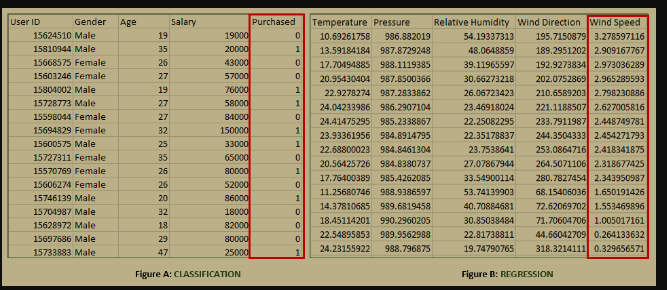

Both the above figures have labelled data set as follows:  

Figure A: It is a dataset of a shopping store that is useful in predicting whether a customer will purchase a particular product under consideration or not based on his/ her gender, age, and salary.

Input: Gender, Age, Salary

Output: Purchased i.e. 0 or 1; 1 means yes the customer will purchase and 0 means that the customer won’t purchase it.


Figure B: It is a Meteorological dataset that serves the purpose of predicting wind speed based on different parameters.

Input: Dew Point, Temperature, Pressure, Relative Humidity, Wind Direction

Output: Wind Speed

Training the system: While training the model, data is usually split in the ratio of 80:20 i.e. 80% as training data and the rest as testing data. In training data, we feed input as well as output for 80% of data. The model learns from training data only.

Learning means that the model will build some logic of its own.
Once the model is ready then it is good to be tested. At the time of testing, the input is fed from the remaining 20% of data that the model has never seen before, the model will predict some value and we will compare it with the actual output and calculate the accuracy.

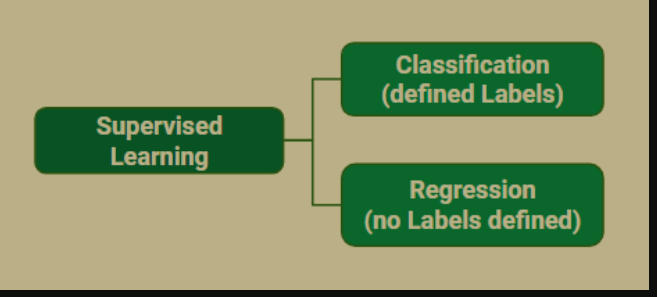





### A. Classification:
It is a Supervised Learning task where output is having defined labels(discrete value). For example in above Figure A, Output – Purchased has defined labels i.e. 0 or 1; 1 means the customer will purchase, and 0 means that the customer won’t purchase. The goal here is to predict discrete values belonging to a particular class and evaluate them on the basis of accuracy.

It can be either binary or multi-class classification. In binary classification, the model predicts either 0 or 1; yes or no but in the case of multi-class classification, the model predicts more than one class. Example: Gmail classifies mails in more than one class like social, promotions, updates, and forums.

### B. Regression:
It is a Supervised Learning task where output is having continuous value.
For example in above Figure B, Output – Wind Speed is not having any discrete value but is continuous in a particular range. The goal here is to predict a value as much closer to the actual output value as our model can and then evaluation is done by calculating the error value. The smaller the error the greater the accuracy of our regression model.

Example of Supervised Learning Algorithms:  

Linear Regression
Logistic Regression
Nearest Neighbor
Gaussian Naive Bayes
Decision Trees
Support Vector Machine (SVM)
Random Forest



 ML | Types of Learning – Supervised Learning
Supervised learning is a type of machine learning in which the algorithm is trained on a labeled dataset, which means that the output (or target) variable is already known. The goal of supervised learning is to learn a function that can accurately predict the output variable based on the input variables.

Supervised learning is further divided into two main categories as follows:
* Classification: In classification, the output variable is a categorical variable, and the goal is to predict the class or category to which a new data point belongs. Examples of classification problems include image classification, spam detection, and sentiment analysis.    

* Regression: In regression, the output variable is a continuous variable, and the goal is to predict the value of the output variable based on the input variables. Examples of regression problems include predicting stock prices, weather forecasting, and sales forecasting.


## Classification vs Regresion in machine learing

### 1. Classification algorithms

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in the input and then labes are predicted for the data.

* in classification task, we are supposed to predict discrete target varaible (class labels) using independent features.
* in the classification task, we are supposed to find a decision boundary that can separate the different classes in the target variable.


The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with problems where the data can be divided into binary or multiple discrete labels. Let’s take an example, suppose we want to predict the possibility of the winning of a match by Team A on the basis of some parameters recorded earlier. Then there would be two labels Yes and No.

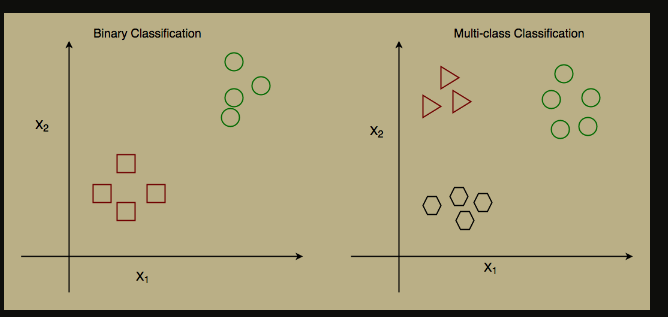


#### Types of Classification Algorithms
There are different types of State of the art classification algorithms that have been developed over time to give the best results for classification tasks by employing techniques like bagging and boosting.


* Decision Tree
* Random Forest Classifier
* K – Nearest Neighbors
* Support Vector Machine

### 2. Regression algorithms

Regression is the process of finding a model or function for distinguishing the data into countinuous real values instead of using class or discrete values. It can also identify the distribution movement depending on the historical data. Because a regression predictive model predicts a quantity, therefore, the skill of the model must be reported as an error in those predictions.

* in a regression task, we are supposed to predict a continuous target variable using independent features.
* in the regression tasks, we are faced with generally two types of problems linear and non-linear regression.


Let’s take a similar example in regression also, where we are finding the possibility of rain in some particular regions with the help of some parameters recorded earlier. Then there is a probability associated with the rain.


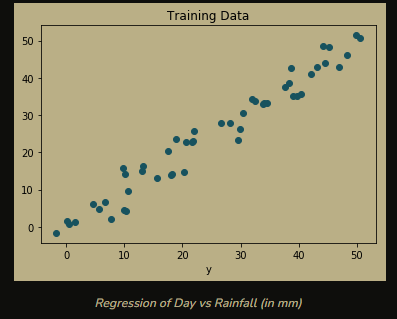

### Types of Regression algorithms


There are different types of State of the art regression algorithms that have been developed over time to give the best results for regression tasks by employing techniques like bagging and boosting.

* Lasso Regression
* Ridge Regression
* XGBoost Regressor
* LGBM Regressor

Comparison between Classification an Regretion

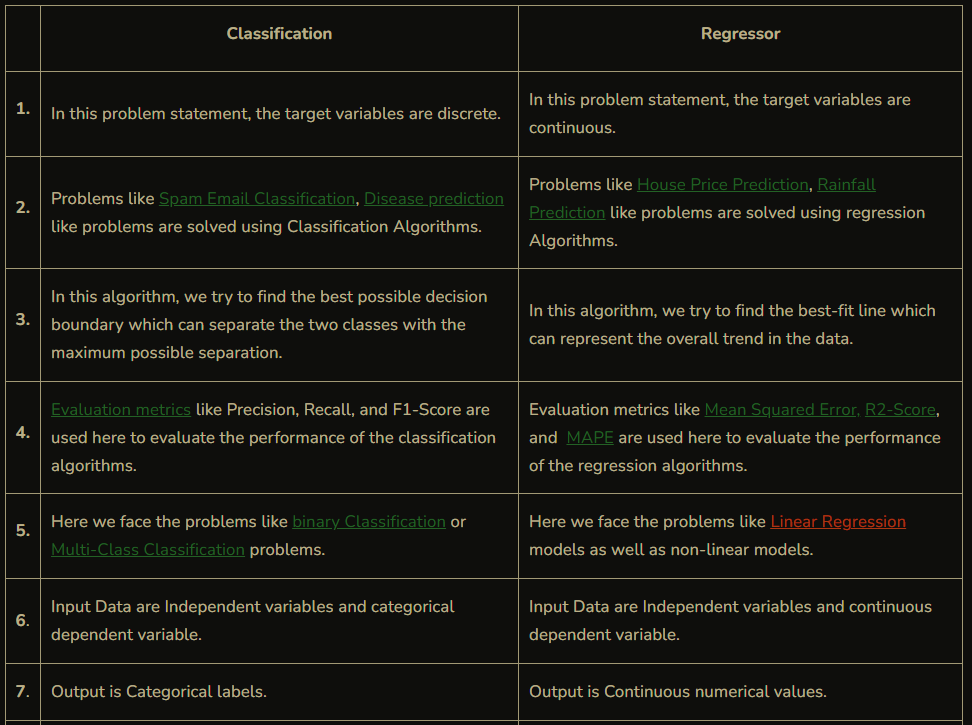

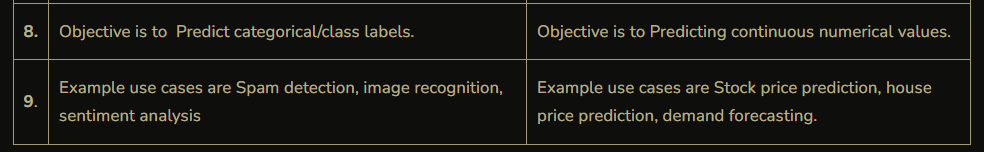

Classification is the task of "classifying things" into subcategories. In Machine Learning nad statistics, Classification is the problem of identifying to which of a set of categories (subpopulations), anew observation velongs, on the basic of a training set of data containing observations and whouse categories memberships is known.


Classification is a machine learing task thath involves assigning a class label to a given input based on a set of traning data. The goal classification is to build a model that can accurately predict the class label for new, unseen data.

### Here are some steps to get started with classification:

1. Understanding the problem: Before getting started with classification, it is importan to undestand the problem you are trying to solve. What are the class labels you are trying to predict? What is the relationship between the input data and the class labels?

2. Data preparation: This includes collecting and preprocessing the data, and splitting it into trainning, validation, and test sets.

3. Selecting a model: It is important to select a model that is apropriate for your problem, taking into account the size and complexity of you data, and the computational resources you have available.

4. Training the model: Once you have selected a model, the nex step is to train it on your training data. This involves adjusting the parameters of the model to minimize the error between the predicted class labels and the actual class labels for the training data.

5. Evaluating the model: After training the model, it is importan to evaluate its performance on validation set. This will give you a good idea of how well the model is likely to perform on new, unseen data.

6. Fine-tuning the model: If the model´s performance is not satisfactory, you can fine-tune it by adjusting the parameters, or trying a differente model.

7. Deploying the model: Finally, once you are satisfied with the performance of the model, you can deploy it to make predictions on new data.

8. These are the basic steps to get started with classification.

### Types of Classifications:
1. Binary Classification: When we have to categorize given data into 2 distinc class.
2. Multiclass classification: the number of classes is more thath 2.

# Decision Tree introduction

A decision tree is a type of supervised learning algorihm that is commonly used in machine learning to model and preduct outcome based on input data. It is a tree-like structure where each internal node represents a decision or test on a specific feature or attribute, each branch represents the outcome of the decision, and each leaf node represents the final decision or predicton.

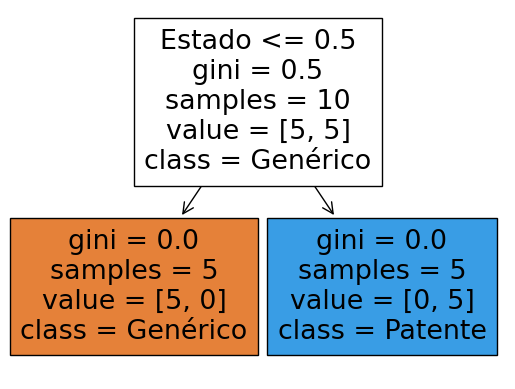

In [ ]:
# Importar bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Crear conjunto de datos de ejemplo
X = [[1, 40, 100, 0], [0, 50, 200, 1], [1, 35, 300, 1], [1, 25, 50, 0], [0, 70, 0, 0], [0, 55, 150, 1], [1, 60, 0, 0], [0, 45, 75, 1], [0, 30, 500, 0], [1, 65, 100, 1]]
y = ['Genérico', 'Patente', 'Patente', 'Genérico', 'Genérico', 'Patente', 'Genérico', 'Patente', 'Genérico', 'Patente']

# Crear modelo de árbol de decisiones
modelo = DecisionTreeClassifier()
modelo.fit(X, y)

# Visualizar árbol de decisiones
plot_tree(modelo, feature_names=['Empleado', 'Edad', 'Gasto', 'Estado'], class_names=['Genérico', 'Patente'], filled=True)

plt.show()